In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Figura 3.1

Hacemos el problema de 2 cuerpos y calculamos el error segun el time step

In [7]:
G = 6.674e-11  # Unidades N*m^2/kg^2
eps = 0.05      #softening 
N = 2

e = 0.017     # excentricidad de la orbita
a = 1.496e11        # semieje mayor
p = a*(1-e)     #distancia al pericentro

m = np.array([2e30, 6e24]) #masas

mu = G *(m[0]+m[1])
nn = np.sqrt(mu/a**3)

vp = nn * a * np.sqrt((1+e)/(1-e)) #velocidad en el pericentro
# vp=0.
print vp/1000

apo = a*(1+e)
b = a * np.sqrt(1-e**2)
print b, a

30.382721393468877
149578381237.93158 1.496e+11


In [8]:
#periodo
T = 2*pi/nn
print T


31467954.114104185


In [9]:
#posiciones y velocidades iniciales

pos = np.array([[0.,0.,0.],[p,0.,0.]])

vel = np.array([[0.,0.,0.],[0.,vp,0.]])


[[0.000000e+00 0.000000e+00 0.000000e+00]
 [1.470568e+11 0.000000e+00 0.000000e+00]]


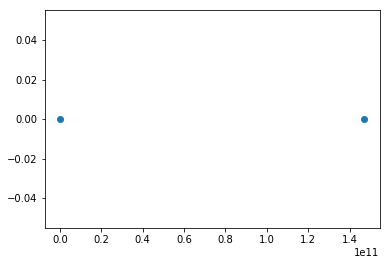

In [5]:
print pos
plt.plot(pos[:,0],pos[:,1],'o')

In [6]:
#NOTA: EN integradores_modificados.f90 están las subrutinas que calculan:
#-----> aceleraciones: aceleracion(eps,m,x,y,z,n,ax,ay,az)
#-----> integrador tipo EULER: euler(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,n)
#-----> Integrador tipo RUNGEKUTTA: rungek(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,n)
#-----> Integrador tipo leapfrog KDK: kickdkick(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,n)
#-----> Integrador tipo leapfrog DKD: driftkdrift(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az,n)


In [6]:
#Aca calculamos las aceleraciones con fortran
from ipdc import *
ax,ay,az = integradores.aceleracion(eps,m,pos[:,0],pos[:,1],pos[:,2])
print ax, ay, az

[ 1.8516854e-08 -6.1722849e-03] [0. 0.] [0. 0.]


### Acá definimos el paso y el numero de pasos

In [3]:
tiempo = 100.
dt = np.array([1e-2, 10**-2.5, 1e-3, 1e-4, 10**-4.5, 1e-5, 10**-5.5, 1e-6, 10**-6.5]) #pasos
nit = np.int_(tiempo/dt) #numero de pasos
print nit
print dt

[    10000     31622    100000   1000000   3162277  10000000  31622776
 100000000 316227766]
[1.00000000e-02 3.16227766e-03 1.00000000e-03 1.00000000e-04
 3.16227766e-05 1.00000000e-05 3.16227766e-06 1.00000000e-06
 3.16227766e-07]


#### Integramos desde el programa fig3-1.py y obtenemos el archivo salida.dat donde están las posiciones y velocidades de las partículas al final de la integración

In [46]:
path = '/home/omarioni/mn2/_data/cap3/'
N=2
data = np.loadtxt(path+'salida.dat')

xf = data[:,0]
yf = data[:,1]
zf = data[:,2]

vxf = data[:,3]
vyf = data[:,4]
vzf = data[:,5]

print shape(xf)

(18,)


In [39]:
path = '/home/omarioni/mn2/_data/cap3/'
N=2
data = np.loadtxt(path+'salida_0.dat')

xf = data[:,0]
yf = data[:,1]
zf = data[:,2]

vxf = data[:,3]
vyf = data[:,4]
vzf = data[:,5]

print shape(xf)

(2,)


In [47]:
from energiafig3 import *
eps=0
e_pot = np.zeros(len(xf))

for i in range(0,len(xf), N):
    e_pot[i:N+i] = energia.epot(eps,m,xf[i:N+i],yf[i:N+i],zf[i:N+i])

print e_pot


[5.32918206e+33 5.32918206e+33 4.90169980e+33 4.90169980e+33
 5.45559863e+33 5.45559863e+33 5.43916638e+33 5.43916638e+33
 5.43312058e+33 5.43312058e+33 5.42439413e+33 5.42439413e+33
 5.42977098e+33 5.42977098e+33 5.43747597e+33 5.43747597e+33
 5.45938772e+33 5.45938772e+33]


In [40]:
from energiafig3 import *
eps=0
e_pot = energia.epot(eps,m,xf,yf,zf)

print e_pot


[5.32816723e+33 5.32816723e+33]


In [41]:
from energiafig3 import *
eps=0
N=2
e_pot0 = energia.epot(eps,m,pos[:,0],pos[:,1],pos[:,2])

print e_pot0

[5.44605913e+33 5.44605913e+33]


In [48]:
U = np.zeros(len(xf)/N)
K = np.zeros(len(xf)/N)
j=0

for i in range(0,len(xf),N):
    
    U[j] = np.sum(e_pot[i:i+N])

    K_ = (1/2.) * m * (vxf[i:i+N]**2 + vyf[i:i+N]**2 + vzf[i:i+N]**2)
    K[j] = np.sum(K_)
    
    j = j + 1
    
E = K - 0.5*U

U0 = np.sum(e_pot0)
K0 = np.sum( (1/2.) * m * (vel[:,0]**2 + vel[:,1]**2 + vel[:,2]**2))
E0 = K0 - 0.5*U0

dEr = abs((E - E0)/E0)


In [42]:
U = np.sum(e_pot)

K_ = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K= np.sum(K_)

E = K - 0.5*U

U0 = np.sum(e_pot0)
K0 = np.sum( (1/2.) * m * (vel[:,0]**2 + vel[:,1]**2 + vel[:,2]**2))
E0 = K0 - 0.5*U0

dE = abs((E - E0)/E0)


In [43]:
print np.log10(dE)
print dE

-3.6564368097923463
0.0002205785056602009


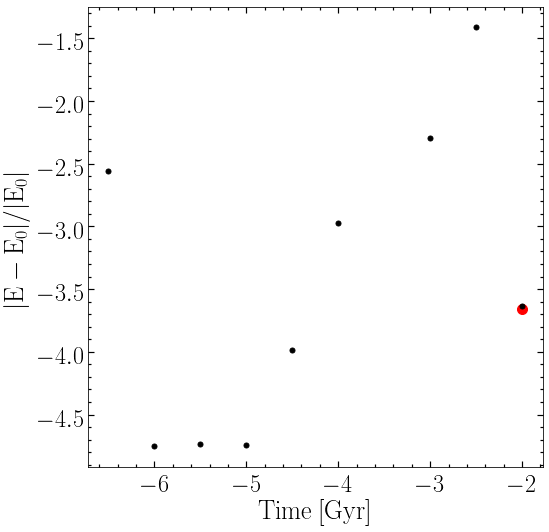

In [49]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(np.log10(1e-2),np.log10(dE),'.r', markersize=20)
ax.plot(np.log10(dt),np.log10(dEr),'.k', markersize=10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{|E-E_{0}|/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

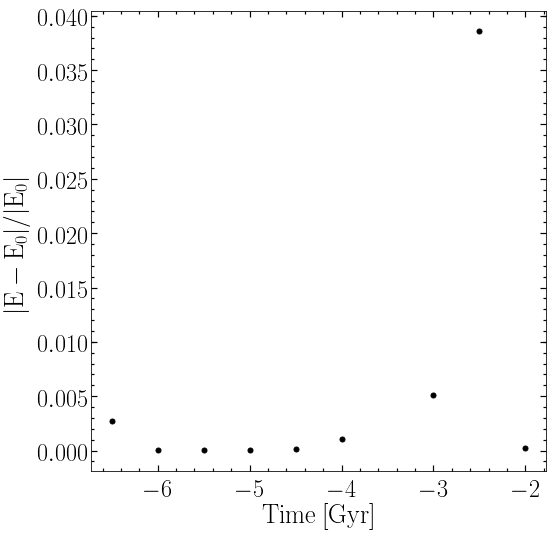

In [38]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(np.log10(dt),abs((E-E0)/E0),'.k', markersize=10)
# ax.plot(np.log10(dt),U/2.,'.b', markersize=10)
# ax.plot(np.log10(dt),K,'.r', markersize=10)
# ax.plot(np.log10(dt[1]),E0,'.g', markersize=10)
# ax.plot(np.log10(dt[1]),K0,'.g', markersize=10)
# ax.plot(np.log10(dt[1]),U0/2,'.g', markersize=10)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{|E-E_{0}|/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## Vamos a integrar la ec diferencial (3.24) del libro con los diferentes integradores.

In [2]:
def f(x,y):
    f = np.sqrt(x + y/4.)
    return f


In [3]:
x1 = 1.
y1 = 1.
x2 = 2.
dx = x2 - x1


#### Euler

In [8]:
y2 = y1 + f(x1,y1)*dx

print y2

2.118033988749895


#### Runge - Kutta de 2º orden

In [27]:
h = dx

k1 = f(x1, y1)
k2 = f(x1+h, y1 + k1*h)
y2 = y1 + h*(k1+k2)/2.
print  y2


2.354238425359342


#### Método del punto medio o Euler modificado (así esta en el libro)

In [28]:
h = dx

k1 = h*f(x1, y1)
y2 = y1 + h*f(x1 + h/2., y1 + k1/2.)
print  y2

2.3746833266588117


#### Runge - Kutta de 4º orden

In [10]:
k1 = f(x1, y1)
k2 = f(x1 + dx*0.5, y1 + k1*dx*0.5)
k3 = f(x1 + dx*0.5, y1 + k2*dx*0.5)
k4 = f(x1 + dx, y1 + k3*dx)
    
y2 = y1 + dx*(k1/6. + k2/3. + k3/3. + k4/6.)

print y2    

2.3752325972431034
